# Mask R-CNN Training (Demo)


<small><i>Updated 11/03/2023<small>


This notebook shows how to train Mask R-CNN ([by Matterport](https://github.com/matterport/Mask_RCNN)) on your own dataset.
This is a demo version which allows you to train your detector for 1 class.

The full tutorial is available here: [Tutorial](https://pysource.com/2021/08/10/train-mask-r-cnn-for-image-segmentation-online-free-gpu)

---

**With the FULL VERSION YOU CAN:**
- Train for multiple classes
- Improve accuracy (longer training and bigger images)
- Import the custom detector on Python with Opencv
- Run detector in realtime on a Video or from a Webcam
- Continue the training (if interrupted)
- Integration with Google Drive (to save there weigths and images)
- Evaluate the accuracy of your Model

You can get the FULL Version here: [Mask RCNN PRO](https://pysource.com/mask-rcnn-training-pro/)

---





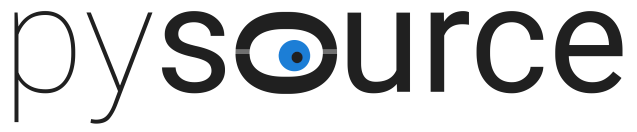

## **1. Installation**

Update to Tensorflow 2.5

In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2023-03-25 07:30:11--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.3’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M  21.3MB/s    in 8.4s    

2023-03-25 07:30:20 (49.1 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.3’ saved [430460776/430460776]

(Reading database ... 128285 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.0.77-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+cuda11.2) ...
lrwxrwxrwx 1 root root     17 Jan 25  2021 /usr/lib/x86_64-linux-gn

Install Mask R-CNN

In [ ]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2023-03-25 07:37:15--  https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
Resolving psfiles.link (psfiles.link)... 34.90.26.83
Connecting to psfiles.link (psfiles.link)|34.90.26.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59799 (58K) [application/zip]
Saving to: ‘mrcnn_demo_PIBVGJTEFX.zip.2’

mrcnn_demo_PIBVGJTE 100%[===================>]  58.40K  --.-KB/s    in 0.09s   

2023-03-25 07:37:15 (664 KB/s) - ‘mrcnn_demo_PIBVGJTEFX.zip.2’ saved [59799/59799]

Archive:  mrcnn_demo_PIBVGJTEFX.zip
replace maskrcnn_colab/mrcnn_demo/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## **2. Image Dataset**

Load your annotated dataset


In [ ]:
# Extract Images
images_path = "burger.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/burger")

Extracted: 80 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/burger", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/burger", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/annotations.json
Annotation json path:  /content/annotations.json
Train: 72
Validation: 8
Classes: 1


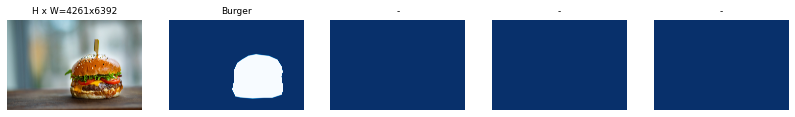

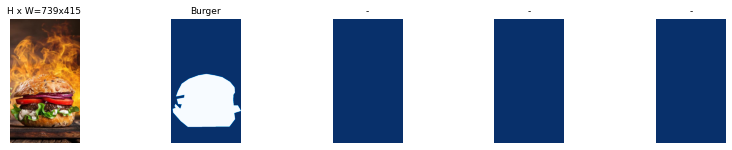

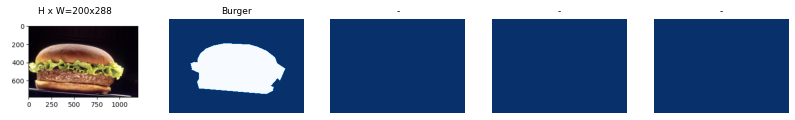

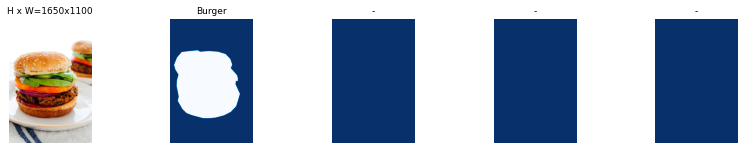

In [ ]:
# Load image samples
display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230324T1339/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

## **4. Detection (test your model on a random image)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/maskrcnn_colab/logs/object20230324T1339/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


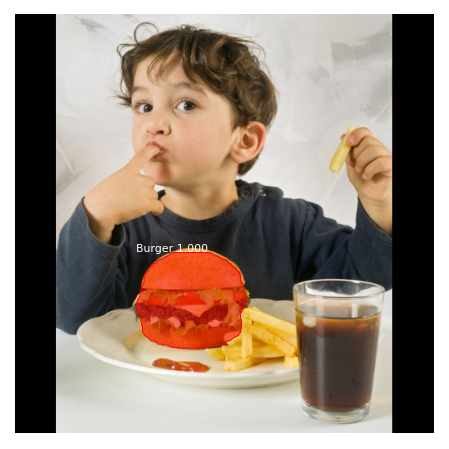

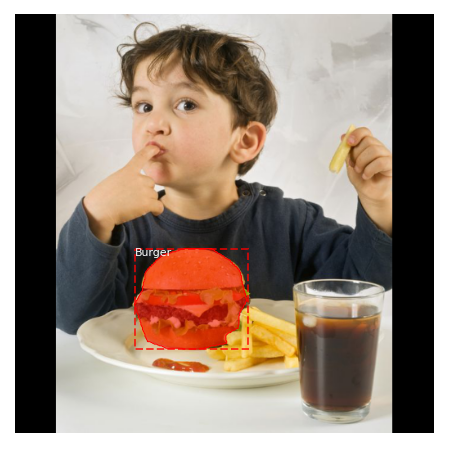

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

### Test image

In [ ]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

--2023-03-24 14:22:39--  https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
Resolving psfiles.link (psfiles.link)... 34.90.26.83
Connecting to psfiles.link (psfiles.link)|34.90.26.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59799 (58K) [application/zip]
Saving to: ‘mrcnn_demo_PIBVGJTEFX.zip.1’

mrcnn_demo_PIBVGJTE 100%[===================>]  58.40K   291KB/s    in 0.2s    

2023-03-24 14:22:41 (291 KB/s) - ‘mrcnn_demo_PIBVGJTEFX.zip.1’ saved [59799/59799]

Archive:  mrcnn_demo_PIBVGJTEFX.zip
replace maskrcnn_colab/mrcnn_demo/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_colab/mrcnn_demo/model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_colab/mrcnn_demo/m_rcnn.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_colab/mrcnn_demo/parallel_model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_colab/mrcnn_demo/utils.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_co

In [ ]:
# Load Image
img = cv2.imread("/content/b2.png")

test_model, inference_config = load_inference_model(1, "/content/maskrcnn_colab/logs/object20230324T1339/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
ncolors = random_colors(80)

Loading weights from  /content/maskrcnn_colab/logs/object20230324T1339/mask_rcnn_object_0005.h5
Re-starting from epoch 5


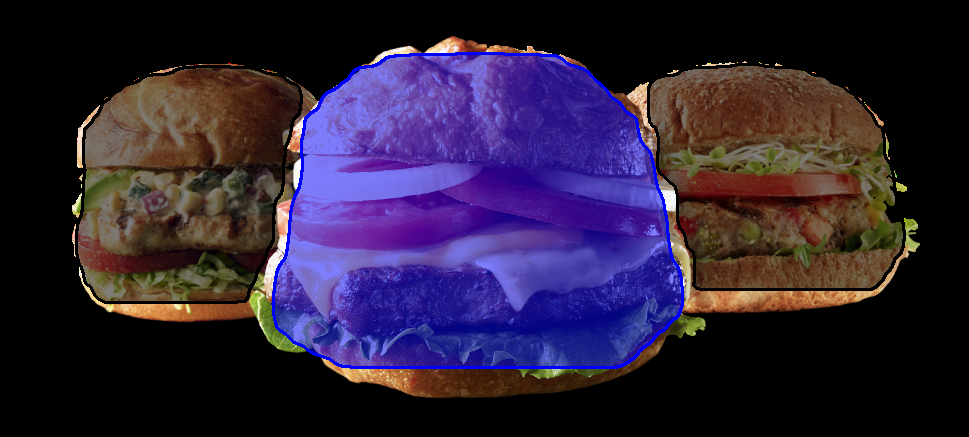

In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
color = (255, 0, 0)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, color[i], 2)
        img = draw_mask(img, [cnt], color[i])

cv2_imshow(img)